<a href="https://colab.research.google.com/github/DJLee68/MachineLearningProject/blob/master/Assignment10/DJLee_Assignment10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import torch.nn as nn
from torchvision import transforms, utils, datasets
import matplotlib.pyplot as plt


transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,)),  # mean value = 0.1307, standard deviation value = 0.3081
])

data_path = './MNIST'

train_data = datasets.MNIST(root = data_path, train= True, download=True, transform= transform)
test_data = datasets.MNIST(root = data_path, train= False, download=True, transform= transform)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
 class Classification(nn.Module):
    def __init__(self):
        super(Classification, self).__init__()
        
        # construct layers for a neural network
        self.classifier1 = nn.Sequential(
            nn.Linear(in_features=28*28, out_features=20*20),
            nn.Sigmoid(),
        ) 
        self.classifier2 = nn.Sequential(
            nn.Linear(in_features=20*20, out_features=10*10),
            nn.Sigmoid(),
        ) 
        self.classifier3 = nn.Sequential(
            nn.Linear(in_features=10*10, out_features=10),
            nn.LogSoftmax(dim=1),
        ) 
        
        
    def forward(self, inputs):                 # [batchSize, 1, 28, 28]
        x = inputs.view(inputs.size(0), -1)    # [batchSize, 28*28]
        x = self.classifier1(x)                # [batchSize, 20*20]
        x = self.classifier2(x)                # [batchSize, 10*10]
        out = self.classifier3(x)              # [batchSize, 10]
        
        return out


In [ ]:
lr=0.001

criterion = nn.NLLLoss()
classification = Classification().to(device)
optimizer = torch.optim.SGD(classification.parameters(), lr=lr)

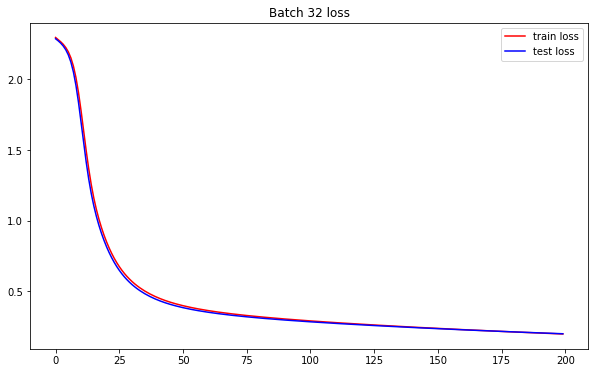

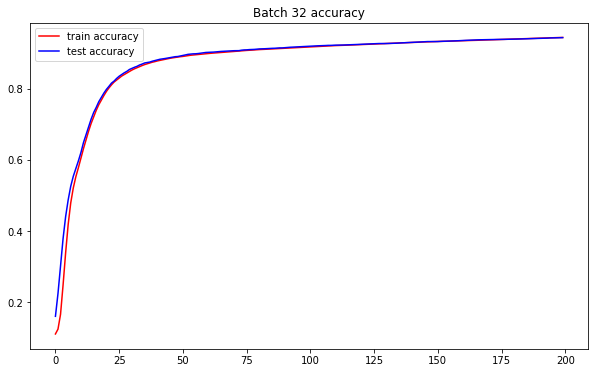

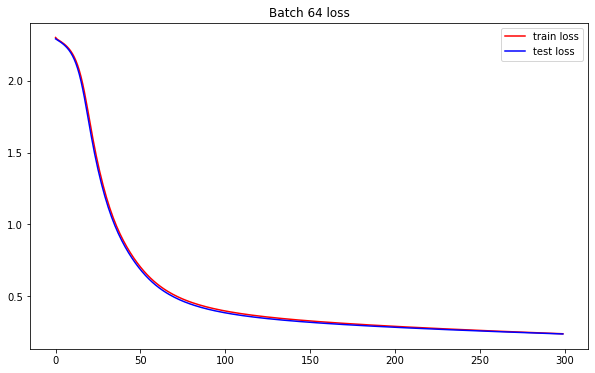

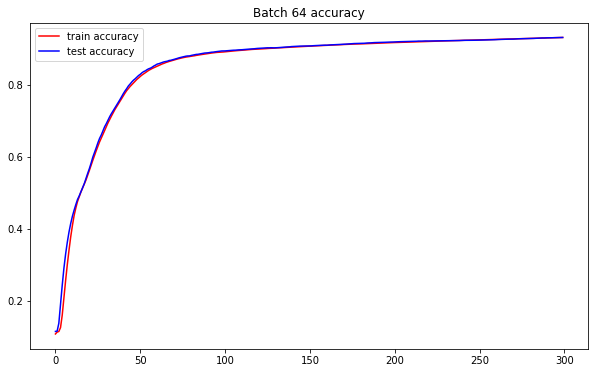

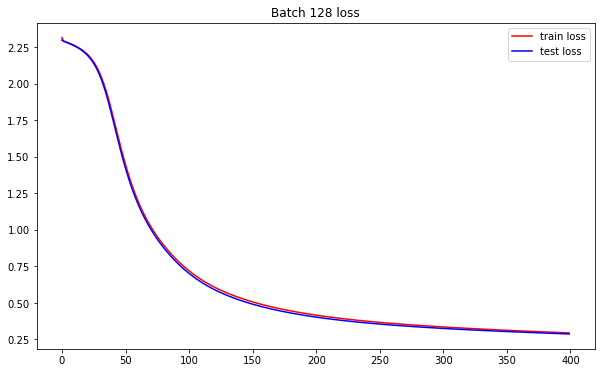

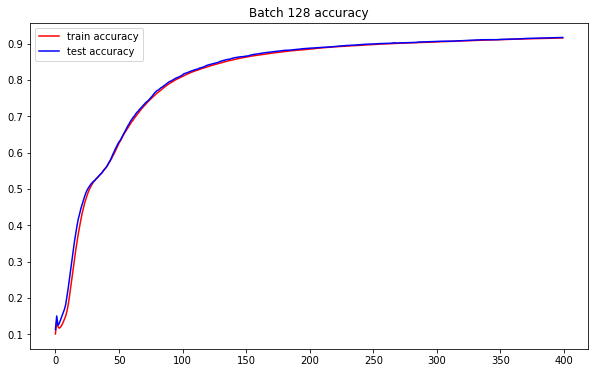

mini batch size  32  64  128
training loss   0.19790151994625726   0.23820224191262715  0.2947566736735769
testing loss     0.19945244435161447  0.2366508606014548  0.287505313282526
mini batch size  32  64  128
training acc   0.9431166648864746   0.9313366413116455  0.9156061410903931
testing acc     0.9426916837692261  0.931329607963562  0.9169303774833679


In [ ]:
def run_epoch (train_data, test_data):
    
    tr_loss = 0
    tr_acc = 0
    iter = len(train_data)
    
    for img_i, label_i in train_data: #{
        img_i, label_i = img_i.to(device), label_i.to(device)

        optimizer.zero_grad()
        # Forward
        y_pred = classification.forward(img_i.view(-1, 28*28))
        ps = torch.exp(y_pred)
        correct = (label_i == ps.max(dim=1)[1])
        # Loss computation
        loss  = criterion(y_pred, label_i)
        # Backward
        loss.backward()
        # Optimize for img_i
        optimizer.step()
        tr_loss += loss.item()
        tr_acc += correct.type(torch.FloatTensor).mean()
    #}
    tr_loss /= iter
    tr_acc /= iter
    
    test_loss = 0
    test_acc = 0
    iter_test = len(test_data)
    
    for img_j, label_j in test_data:
        img_j, label_j = img_j.to(device), label_j.to(device)
        correct = 0
        with torch.autograd.no_grad():
            predicted = classification.forward(img_j.view(-1, 28*28))
            ps = torch.exp(predicted)
            correct = (label_j == ps.max(dim=1)[1])
            test_loss += criterion(predicted, label_j).item()
            test_acc += correct.type(torch.FloatTensor).mean()
    
    test_loss /= iter_test
    test_acc /= iter_test
    return tr_loss, tr_acc, test_loss, test_acc


final_train_loss = []
final_test_loss = []
final_train_acc = []
final_test_acc = []

def run(batch_size, epochs): #{
  lr=0.001
  global classification, optimizer, criterion
  criterion = nn.NLLLoss()
  classification = Classification().to(device)
  optimizer = torch.optim.SGD(classification.parameters(), lr=lr)
  
  global final_train_loss, final_test_loss, final_train_acc, final_test_acc
  train_data_loader = torch.utils.data.DataLoader(train_data, batch_size, shuffle=False)
  test_data_loader  = torch.utils.data.DataLoader(test_data, batch_size, shuffle=False)
  mini_batch_data, mini_batch_label  = next(iter(train_data_loader))
  
  train_loss = []
  test_loss = []
  train_acc = []
  test_acc = []

  for epoch in range(epochs): #{
    tr_loss, tr_acc, te_loss, te_acc = run_epoch(train_data_loader, test_data_loader)
    train_loss.append(tr_loss)
    train_acc.append(tr_acc)
    test_loss.append(te_loss)
    test_acc.append(te_acc)
  #}

  final_train_loss.append(train_loss[-1])
  final_test_loss.append(test_loss[-1])
  final_train_acc.append(train_acc[-1])
  final_test_acc.append(test_acc[-1])

  return train_loss, test_loss, train_acc, test_acc

#}

train_loss_32, test_loss_32, train_acc_32, test_acc_32 = run(32, 200)
train_loss_64, test_loss_64, train_acc_64, test_acc_64 = run(64, 300)
train_loss_128, test_loss_128, train_acc_128, test_acc_128 = run(128, 400)

# Plot image
plt.figure(0, figsize=(10,6))
plt.plot(train_loss_32, label='train loss', c='r')
plt.plot(test_loss_32, label='test loss', c='b')
plt.title(f'Batch 32 loss')
plt.legend()
plt.show()

plt.figure(1, figsize=(10,6))
plt.plot(train_acc_32, label='train accuracy', c='r')
plt.plot(test_acc_32, label='test accuracy', c='b')
plt.title(f'Batch 32 accuracy')
plt.legend()
plt.show()  

plt.figure(2, figsize=(10,6))
plt.plot(train_loss_64, label='train loss', c='r')
plt.plot(test_loss_64, label='test loss', c='b')
plt.title(f'Batch 64 loss')
plt.legend()
plt.show()

plt.figure(3, figsize=(10,6))
plt.plot(train_acc_64, label='train accuracy', c='r')
plt.plot(test_acc_64, label='test accuracy', c='b')
plt.title(f'Batch 64 accuracy')
plt.legend()
plt.show()  

plt.figure(4, figsize=(10,6))
plt.plot(train_loss_128, label='train loss', c='r')
plt.plot(test_loss_128, label='test loss', c='b')
plt.title(f'Batch 128 loss')
plt.legend()
plt.show()

plt.figure(5, figsize=(10,6))
plt.plot(train_acc_128, label='train accuracy', c='r')
plt.plot(test_acc_128, label='test accuracy', c='b')
plt.title(f'Batch 128 accuracy')
plt.legend()
plt.show()  


# Print final loss
print("mini batch size  32  64  128")
print(f"training loss   {final_train_loss[0]}   {final_train_loss[1]}  {final_train_loss[2]}")
print(f"testing loss     {final_test_loss[0]}  {final_test_loss[1]}  {final_test_loss[2]}")

print("mini batch size  32  64  128")
print(f"training acc   {final_train_acc[0]}   {final_train_acc[1]}  {final_train_acc[2]}")
print(f"testing acc     {final_test_acc[0]}  {final_test_acc[1]}  {final_test_acc[2]}")

## Output using the dataset

 1. Plot the training and testing losses with a batch size of 32 

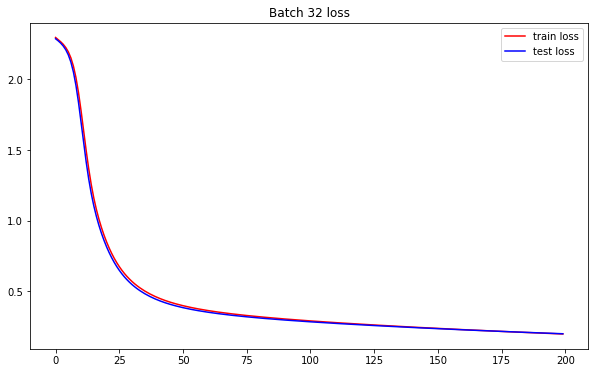

In [ ]:
plt.figure(0, figsize=(10,6))
plt.plot(train_loss_32, label='train loss', c='r')
plt.plot(test_loss_32, label='test loss', c='b')
plt.title(f'Batch 32 loss')
plt.legend()
plt.show()

 2. Plot the training and testing accuracies with a batch size of 32

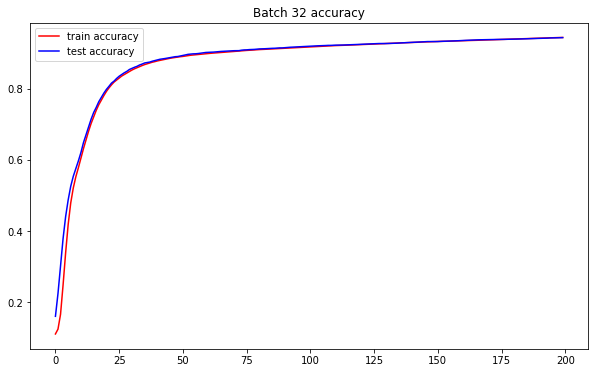

In [ ]:
plt.figure(1, figsize=(10,6))
plt.plot(train_acc_32, label='train accuracy', c='r')
plt.plot(test_acc_32, label='test accuracy', c='b')
plt.title(f'Batch 32 accuracy')
plt.legend()
plt.show() 

3. Plot the training and testing losses with a batch size of 64

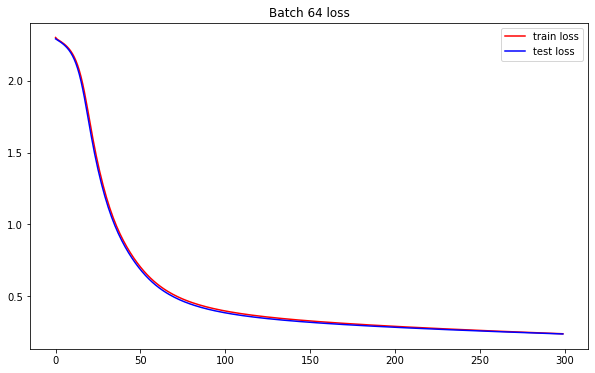

In [ ]:
plt.figure(2, figsize=(10,6))
plt.plot(train_loss_64, label='train loss', c='r')
plt.plot(test_loss_64, label='test loss', c='b')
plt.title(f'Batch 64 loss')
plt.legend()
plt.show()

4. Plot the training and testing accuracies with a batch size of 64

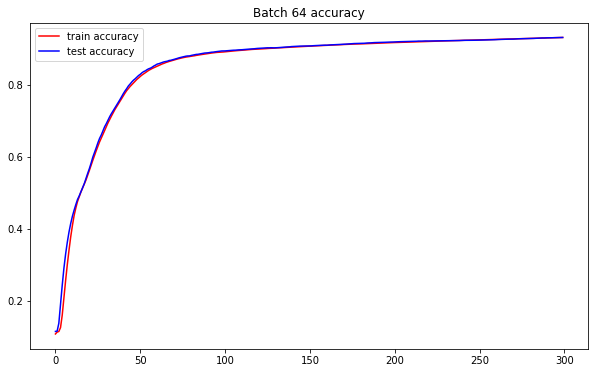

In [ ]:
plt.figure(3, figsize=(10,6))
plt.plot(train_acc_64, label='train accuracy', c='r')
plt.plot(test_acc_64, label='test accuracy', c='b')
plt.title(f'Batch 64 accuracy')
plt.legend()
plt.show()  

5. Plot the training and testing losses with a batch size of 128 

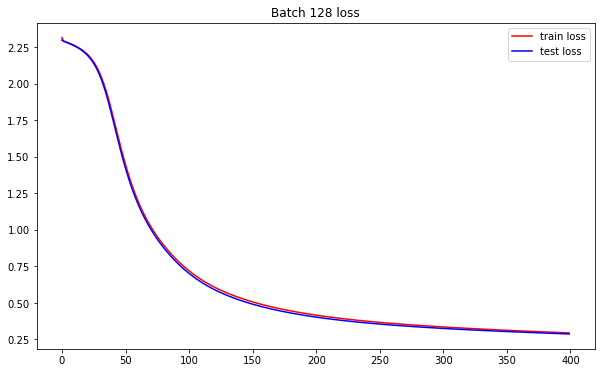

In [ ]:
plt.figure(4, figsize=(10,6))
plt.plot(train_loss_128, label='train loss', c='r')
plt.plot(test_loss_128, label='test loss', c='b')
plt.title(f'Batch 128 loss')
plt.legend()
plt.show()

6. Plot the training and testing accuracies with a batch size of 128

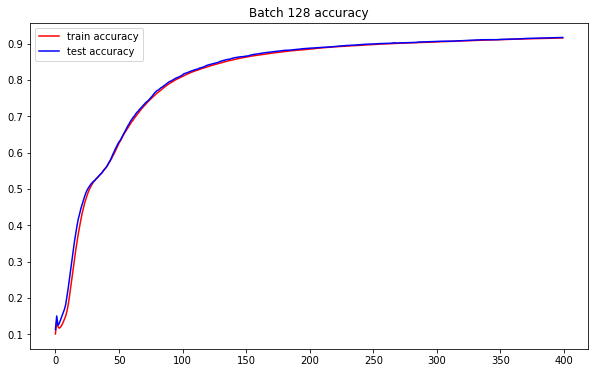

In [ ]:
plt.figure(5, figsize=(10,6))
plt.plot(train_acc_128, label='train accuracy', c='r')
plt.plot(test_acc_128, label='test accuracy', c='b')
plt.title(f'Batch 128 accuracy')
plt.legend()
plt.show()  

7. Print the loss at convergence with different mini-batch sizes

In [ ]:
print("mini batch size  32                64               128")
print(f"training loss   {final_train_loss[0]}   {final_train_loss[1]}  {final_train_loss[2]}")
print(f"testing loss     {final_test_loss[0]}  {final_test_loss[1]}  {final_test_loss[2]}")

mini batch size  32                64               128
training loss   0.19790151994625726   0.23820224191262715  0.2947566736735769
testing loss     0.19945244435161447  0.2366508606014548  0.287505313282526


8. Print the accuracy at convergence with different mini-batch sizes

In [ ]:
print("mini batch size  32                64               128")
print(f"training acc   {final_train_acc[0]}   {final_train_acc[1]}  {final_train_acc[2]}")
print(f"testing acc     {final_test_acc[0]}  {final_test_acc[1]}  {final_test_acc[2]}")

mini batch size  32                64               128
training acc   0.9431166648864746   0.9313366413116455  0.9156061410903931
testing acc     0.9426916837692261  0.931329607963562  0.9169303774833679
